# Stanford Dog Image Classification Start

In [1]:
#### import library ####
import os
import gc
import urllib
import shutil
import argparse
import numpy as np ## 1.19.5
import pandas as pd ## 1.1.3
import tensorflow as tf ## 2.4.0
import matplotlib.pyplot as plt ## 3.3.3

from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Stanford dog image download 

In [ ]:
print("Stanford dog images downloading...")
url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
urllib.request.urlretrieve(url, "images.tar")
print("Download complete!")

## Download file decompress

In [3]:
print("Decompressing start")
!tar -xvf "./images.tar" -C "./"     
print("Decompressing complete!")

Decompressing start
Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_11948.jpg
Images/n02085620-Chihuahua/n02085620_1205.jpg
Images/n02085620-Chihuahua/n02085620_12334.jpg
Images/n02085620-Chihuahua/n02085620_1235.jpg
Images/n02085620-Chihuahua/n02085620_1298.jpg
Images/n02085620-Chihuahua/n02085620_13151.jpg
Images/n02085620-Chihuahua/n02085620_1321.jpg
Images/n02085620-Chihuahua/n02085620_13383.jpg
Images/n02085620-Chihuahua/n02085620_1346.jpg
Images/n02085620-Chihuahua/n02085620_14413.jpg
Images/n02085620-Chihuahua/n02085620_14516.jpg
Images/n02085620-Chihuahua/n02085620_1455.jpg
Images/n020

Images/n02086079-Pekinese/n02086079_11322.jpg
Images/n02086079-Pekinese/n02086079_14532.jpg
Images/n02086079-Pekinese/n02086079_17015.jpg
Images/n02086079-Pekinese/n02086079_2933.jpg
Images/n02086079-Pekinese/n02086079_10615.jpg
Images/n02086079-Pekinese/n02086079_8726.jpg
Images/n02086079-Pekinese/n02086079_1820.jpg
Images/n02086079-Pekinese/n02086079_13024.jpg
Images/n02086079-Pekinese/n02086079_6333.jpg
Images/n02086079-Pekinese/n02086079_11984.jpg
Images/n02086079-Pekinese/n02086079_19690.jpg
Images/n02086079-Pekinese/n02086079_3996.jpg
Images/n02086079-Pekinese/n02086079_4984.jpg
Images/n02086079-Pekinese/n02086079_356.jpg
Images/n02086079-Pekinese/n02086079_16367.jpg
Images/n02086079-Pekinese/n02086079_14359.jpg
Images/n02086079-Pekinese/n02086079_146.jpg
Images/n02086079-Pekinese/n02086079_10627.jpg
Images/n02086079-Pekinese/n02086079_15871.jpg
Images/n02086079-Pekinese/n02086079_21987.jpg
Images/n02086079-Pekinese/n02086079_9408.jpg
Images/n02086079-Pekinese/n02086079_952.jpg
I

Images/n02088094-Afghan_hound/n02088094_5244.jpg
Images/n02088094-Afghan_hound/n02088094_5265.jpg
Images/n02088094-Afghan_hound/n02088094_5345.jpg
Images/n02088094-Afghan_hound/n02088094_5355.jpg
Images/n02088094-Afghan_hound/n02088094_5413.jpg
Images/n02088094-Afghan_hound/n02088094_5436.jpg
Images/n02088094-Afghan_hound/n02088094_5488.jpg
Images/n02088094-Afghan_hound/n02088094_5504.jpg
Images/n02088094-Afghan_hound/n02088094_5521.jpg
Images/n02088094-Afghan_hound/n02088094_5559.jpg
Images/n02088094-Afghan_hound/n02088094_5812.jpg
Images/n02088094-Afghan_hound/n02088094_5855.jpg
Images/n02088094-Afghan_hound/n02088094_6035.jpg
Images/n02088094-Afghan_hound/n02088094_6372.jpg
Images/n02088094-Afghan_hound/n02088094_6430.jpg
Images/n02088094-Afghan_hound/n02088094_649.jpg
Images/n02088094-Afghan_hound/n02088094_6493.jpg
Images/n02088094-Afghan_hound/n02088094_7106.jpg
Images/n02088094-Afghan_hound/n02088094_7146.jpg
Images/n02088094-Afghan_hound/n02088094_8063.jpg
Images/n02088094-Afgh

Images/n02089078-black-and-tan_coonhound/n02089078_663.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_4508.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_465.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_2596.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_2021.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_2921.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_1275.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_4422.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_183.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_2404.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_393.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_4098.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_192.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_3613.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_4024.jpg
Images/n02089078-black-and-tan_coonhound/n02089078_1735.jpg
Images/n02089078-black-and-tan_coonhound/n020

Images/n02091134-whippet/n02091134_5047.jpg
Images/n02091134-whippet/n02091134_6057.jpg
Images/n02091134-whippet/n02091134_6159.jpg
Images/n02091134-whippet/n02091134_6616.jpg
Images/n02091134-whippet/n02091134_6699.jpg
Images/n02091134-whippet/n02091134_682.jpg
Images/n02091134-whippet/n02091134_7375.jpg
Images/n02091134-whippet/n02091134_738.jpg
Images/n02091134-whippet/n02091134_755.jpg
Images/n02091134-whippet/n02091134_7567.jpg
Images/n02091134-whippet/n02091134_7606.jpg
Images/n02091134-whippet/n02091134_7736.jpg
Images/n02091134-whippet/n02091134_835.jpg
Images/n02091134-whippet/n02091134_842.jpg
Images/n02091134-whippet/n02091134_9.jpg
Images/n02091134-whippet/n02091134_917.jpg
Images/n02091134-whippet/n02091134_9433.jpg
Images/n02091134-whippet/n02091134_969.jpg
Images/n02091134-whippet/n02091134_9740.jpg
Images/n02091134-whippet/n02091134_9806.jpg
Images/n02091134-whippet/n02091134_13244.jpg
Images/n02091134-whippet/n02091134_16062.jpg
Images/n02091134-whippet/n02091134_16201

Images/n02092339-Weimaraner/n02092339_40.jpg
Images/n02092339-Weimaraner/n02092339_4169.jpg
Images/n02092339-Weimaraner/n02092339_4208.jpg
Images/n02092339-Weimaraner/n02092339_4214.jpg
Images/n02092339-Weimaraner/n02092339_4271.jpg
Images/n02092339-Weimaraner/n02092339_4346.jpg
Images/n02092339-Weimaraner/n02092339_437.jpg
Images/n02092339-Weimaraner/n02092339_4378.jpg
Images/n02092339-Weimaraner/n02092339_4644.jpg
Images/n02092339-Weimaraner/n02092339_4936.jpg
Images/n02092339-Weimaraner/n02092339_4965.jpg
Images/n02092339-Weimaraner/n02092339_511.jpg
Images/n02092339-Weimaraner/n02092339_512.jpg
Images/n02092339-Weimaraner/n02092339_5137.jpg
Images/n02092339-Weimaraner/n02092339_514.jpg
Images/n02092339-Weimaraner/n02092339_52.jpg
Images/n02092339-Weimaraner/n02092339_5292.jpg
Images/n02092339-Weimaraner/n02092339_5329.jpg
Images/n02092339-Weimaraner/n02092339_5411.jpg
Images/n02092339-Weimaraner/n02092339_5438.jpg
Images/n02092339-Weimaraner/n02092339_5845.jpg
Images/n02092339-Weim

Images/n02093991-Irish_terrier/n02093991_2973.jpg
Images/n02093991-Irish_terrier/n02093991_2989.jpg
Images/n02093991-Irish_terrier/n02093991_2995.jpg
Images/n02093991-Irish_terrier/n02093991_3020.jpg
Images/n02093991-Irish_terrier/n02093991_3022.jpg
Images/n02093991-Irish_terrier/n02093991_3034.jpg
Images/n02093991-Irish_terrier/n02093991_3095.jpg
Images/n02093991-Irish_terrier/n02093991_3144.jpg
Images/n02093991-Irish_terrier/n02093991_3174.jpg
Images/n02093991-Irish_terrier/n02093991_3234.jpg
Images/n02093991-Irish_terrier/n02093991_3243.jpg
Images/n02093991-Irish_terrier/n02093991_3300.jpg
Images/n02093991-Irish_terrier/n02093991_3302.jpg
Images/n02093991-Irish_terrier/n02093991_3314.jpg
Images/n02093991-Irish_terrier/n02093991_3383.jpg
Images/n02093991-Irish_terrier/n02093991_3516.jpg
Images/n02093991-Irish_terrier/n02093991_3536.jpg
Images/n02093991-Irish_terrier/n02093991_3604.jpg
Images/n02093991-Irish_terrier/n02093991_3673.jpg
Images/n02093991-Irish_terrier/n02093991_3735.jpg


Images/n02095889-Sealyham_terrier/n02095889_4343.jpg
Images/n02095889-Sealyham_terrier/n02095889_4427.jpg
Images/n02095889-Sealyham_terrier/n02095889_4522.jpg
Images/n02095889-Sealyham_terrier/n02095889_4649.jpg
Images/n02095889-Sealyham_terrier/n02095889_47.jpg
Images/n02095889-Sealyham_terrier/n02095889_4725.jpg
Images/n02095889-Sealyham_terrier/n02095889_4762.jpg
Images/n02095889-Sealyham_terrier/n02095889_4789.jpg
Images/n02095889-Sealyham_terrier/n02095889_4814.jpg
Images/n02095889-Sealyham_terrier/n02095889_4899.jpg
Images/n02095889-Sealyham_terrier/n02095889_4923.jpg
Images/n02095889-Sealyham_terrier/n02095889_4964.jpg
Images/n02095889-Sealyham_terrier/n02095889_4969.jpg
Images/n02095889-Sealyham_terrier/n02095889_5141.jpg
Images/n02095889-Sealyham_terrier/n02095889_5212.jpg
Images/n02095889-Sealyham_terrier/n02095889_5241.jpg
Images/n02095889-Sealyham_terrier/n02095889_5255.jpg
Images/n02095889-Sealyham_terrier/n02095889_5282.jpg
Images/n02095889-Sealyham_terrier/n02095889_539.

Images/n02096585-Boston_bull/n02096585_12168.jpg
Images/n02096585-Boston_bull/n02096585_12844.jpg
Images/n02096585-Boston_bull/n02096585_11817.jpg
Images/n02096585-Boston_bull/n02096585_3738.jpg
Images/n02096585-Boston_bull/n02096585_1586.jpg
Images/n02096585-Boston_bull/n02096585_1532.jpg
Images/n02096585-Boston_bull/n02096585_342.jpg
Images/n02096585-Boston_bull/n02096585_1525.jpg
Images/n02096585-Boston_bull/n02096585_5171.jpg
Images/n02096585-Boston_bull/n02096585_2008.jpg
Images/n02096585-Boston_bull/n02096585_5855.jpg
Images/n02096585-Boston_bull/n02096585_1143.jpg
Images/n02096585-Boston_bull/n02096585_4774.jpg
Images/n02096585-Boston_bull/n02096585_1260.jpg
Images/n02096585-Boston_bull/n02096585_4451.jpg
Images/n02096585-Boston_bull/n02096585_11776.jpg
Images/n02096585-Boston_bull/n02096585_353.jpg
Images/n02096585-Boston_bull/n02096585_5943.jpg
Images/n02096585-Boston_bull/n02096585_3681.jpg
Images/n02096585-Boston_bull/n02096585_2947.jpg
Images/n02096585-Boston_bull/n02096585

Images/n02097658-silky_terrier/n02097658_8053.jpg
Images/n02097658-silky_terrier/n02097658_8409.jpg
Images/n02097658-silky_terrier/n02097658_8653.jpg
Images/n02097658-silky_terrier/n02097658_9136.jpg
Images/n02097658-silky_terrier/n02097658_9300.jpg
Images/n02097658-silky_terrier/n02097658_9330.jpg
Images/n02097658-silky_terrier/n02097658_955.jpg
Images/n02097658-silky_terrier/n02097658_98.jpg
Images/n02097658-silky_terrier/n02097658_983.jpg
Images/n02097658-silky_terrier/n02097658_9987.jpg
Images/n02097658-silky_terrier/n02097658_2114.jpg
Images/n02097658-silky_terrier/n02097658_1797.jpg
Images/n02097658-silky_terrier/n02097658_2523.jpg
Images/n02097658-silky_terrier/n02097658_11235.jpg
Images/n02097658-silky_terrier/n02097658_10854.jpg
Images/n02097658-silky_terrier/n02097658_3345.jpg
Images/n02097658-silky_terrier/n02097658_2054.jpg
Images/n02097658-silky_terrier/n02097658_4728.jpg
Images/n02097658-silky_terrier/n02097658_6605.jpg
Images/n02097658-silky_terrier/n02097658_7162.jpg
Im

Images/n02099429-curly-coated_retriever/n02099429_3103.jpg
Images/n02099429-curly-coated_retriever/n02099429_1359.jpg
Images/n02099429-curly-coated_retriever/n02099429_2281.jpg
Images/n02099429-curly-coated_retriever/n02099429_282.jpg
Images/n02099429-curly-coated_retriever/n02099429_1593.jpg
Images/n02099429-curly-coated_retriever/n02099429_244.jpg
Images/n02099429-curly-coated_retriever/n02099429_1472.jpg
Images/n02099429-curly-coated_retriever/n02099429_2698.jpg
Images/n02099429-curly-coated_retriever/n02099429_915.jpg
Images/n02099429-curly-coated_retriever/n02099429_935.jpg
Images/n02099601-golden_retriever/
Images/n02099601-golden_retriever/n02099601_10.jpg
Images/n02099601-golden_retriever/n02099601_100.jpg
Images/n02099601-golden_retriever/n02099601_1010.jpg
Images/n02099601-golden_retriever/n02099601_1162.jpg
Images/n02099601-golden_retriever/n02099601_1324.jpg
Images/n02099601-golden_retriever/n02099601_1442.jpg
Images/n02099601-golden_retriever/n02099601_146.jpg
Images/n0209

Images/n02100735-English_setter/n02100735_3777.jpg
Images/n02100735-English_setter/n02100735_3899.jpg
Images/n02100735-English_setter/n02100735_3923.jpg
Images/n02100735-English_setter/n02100735_3942.jpg
Images/n02100735-English_setter/n02100735_3998.jpg
Images/n02100735-English_setter/n02100735_4.jpg
Images/n02100735-English_setter/n02100735_4057.jpg
Images/n02100735-English_setter/n02100735_4195.jpg
Images/n02100735-English_setter/n02100735_4208.jpg
Images/n02100735-English_setter/n02100735_4531.jpg
Images/n02100735-English_setter/n02100735_4706.jpg
Images/n02100735-English_setter/n02100735_4735.jpg
Images/n02100735-English_setter/n02100735_4870.jpg
Images/n02100735-English_setter/n02100735_4972.jpg
Images/n02100735-English_setter/n02100735_5024.jpg
Images/n02100735-English_setter/n02100735_5207.jpg
Images/n02100735-English_setter/n02100735_523.jpg
Images/n02100735-English_setter/n02100735_5234.jpg
Images/n02100735-English_setter/n02100735_5265.jpg
Images/n02100735-English_setter/n02

Images/n02102177-Welsh_springer_spaniel/n02102177_1914.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_3447.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_616.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_2010.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_1242.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_1922.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_3875.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_4211.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_2911.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_1681.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_3947.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_4294.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_67.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_3639.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_415.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_2611.jpg
Images/n02102177-Welsh_springer_spaniel/n02102177_210.jpg
Im

Images/n02105056-groenendael/n02105056_6684.jpg
Images/n02105056-groenendael/n02105056_1050.jpg
Images/n02105056-groenendael/n02105056_2525.jpg
Images/n02105056-groenendael/n02105056_5299.jpg
Images/n02105056-groenendael/n02105056_5726.jpg
Images/n02105056-groenendael/n02105056_4787.jpg
Images/n02105056-groenendael/n02105056_4918.jpg
Images/n02105056-groenendael/n02105056_67.jpg
Images/n02105056-groenendael/n02105056_26.jpg
Images/n02105056-groenendael/n02105056_5550.jpg
Images/n02105056-groenendael/n02105056_3294.jpg
Images/n02105056-groenendael/n02105056_5111.jpg
Images/n02105056-groenendael/n02105056_3745.jpg
Images/n02105056-groenendael/n02105056_1960.jpg
Images/n02105056-groenendael/n02105056_2036.jpg
Images/n02105056-groenendael/n02105056_3322.jpg
Images/n02105056-groenendael/n02105056_6567.jpg
Images/n02105056-groenendael/n02105056_4842.jpg
Images/n02105056-groenendael/n02105056_2836.jpg
Images/n02105056-groenendael/n02105056_7435.jpg
Images/n02105056-groenendael/n02105056_785.j

Images/n02106030-collie/n02106030_4592.jpg
Images/n02106030-collie/n02106030_17733.jpg
Images/n02106030-collie/n02106030_17074.jpg
Images/n02106030-collie/n02106030_6409.jpg
Images/n02106030-collie/n02106030_2548.jpg
Images/n02106030-collie/n02106030_18345.jpg
Images/n02106030-collie/n02106030_16370.jpg
Images/n02106030-collie/n02106030_15858.jpg
Images/n02106030-collie/n02106030_15074.jpg
Images/n02106030-collie/n02106030_16186.jpg
Images/n02106030-collie/n02106030_18950.jpg
Images/n02106030-collie/n02106030_17179.jpg
Images/n02106030-collie/n02106030_16212.jpg
Images/n02106030-collie/n02106030_16029.jpg
Images/n02106030-collie/n02106030_486.jpg
Images/n02106030-collie/n02106030_16000.jpg
Images/n02106030-collie/n02106030_7689.jpg
Images/n02106030-collie/n02106030_19103.jpg
Images/n02106030-collie/n02106030_3289.jpg
Images/n02106030-collie/n02106030_14143.jpg
Images/n02106030-collie/n02106030_17819.jpg
Images/n02106030-collie/n02106030_14677.jpg
Images/n02106030-collie/n02106030_16546

Images/n02107312-miniature_pinscher/n02107312_7391.jpg
Images/n02107312-miniature_pinscher/n02107312_7408.jpg
Images/n02107312-miniature_pinscher/n02107312_744.jpg
Images/n02107312-miniature_pinscher/n02107312_7528.jpg
Images/n02107312-miniature_pinscher/n02107312_759.jpg
Images/n02107312-miniature_pinscher/n02107312_7677.jpg
Images/n02107312-miniature_pinscher/n02107312_7703.jpg
Images/n02107312-miniature_pinscher/n02107312_7717.jpg
Images/n02107312-miniature_pinscher/n02107312_7725.jpg
Images/n02107312-miniature_pinscher/n02107312_811.jpg
Images/n02107312-miniature_pinscher/n02107312_843.jpg
Images/n02107312-miniature_pinscher/n02107312_854.jpg
Images/n02107312-miniature_pinscher/n02107312_957.jpg
Images/n02107574-Greater_Swiss_Mountain_dog/
Images/n02107574-Greater_Swiss_Mountain_dog/n02107574_1007.jpg
Images/n02107574-Greater_Swiss_Mountain_dog/n02107574_1010.jpg
Images/n02107574-Greater_Swiss_Mountain_dog/n02107574_1019.jpg
Images/n02107574-Greater_Swiss_Mountain_dog/n02107574_102

Images/n02108422-bull_mastiff/n02108422_751.jpg
Images/n02108422-bull_mastiff/n02108422_1445.jpg
Images/n02108422-bull_mastiff/n02108422_3708.jpg
Images/n02108422-bull_mastiff/n02108422_2111.jpg
Images/n02108422-bull_mastiff/n02108422_1079.jpg
Images/n02108422-bull_mastiff/n02108422_4503.jpg
Images/n02108422-bull_mastiff/n02108422_1958.jpg
Images/n02108422-bull_mastiff/n02108422_4548.jpg
Images/n02108422-bull_mastiff/n02108422_3757.jpg
Images/n02108422-bull_mastiff/n02108422_5117.jpg
Images/n02108422-bull_mastiff/n02108422_2290.jpg
Images/n02108422-bull_mastiff/n02108422_3184.jpg
Images/n02108422-bull_mastiff/n02108422_2379.jpg
Images/n02108422-bull_mastiff/n02108422_158.jpg
Images/n02108422-bull_mastiff/n02108422_3985.jpg
Images/n02108422-bull_mastiff/n02108422_1166.jpg
Images/n02108422-bull_mastiff/n02108422_5327.jpg
Images/n02108422-bull_mastiff/n02108422_1546.jpg
Images/n02108422-bull_mastiff/n02108422_3976.jpg
Images/n02108422-bull_mastiff/n02108422_567.jpg
Images/n02108422-bull_m

Images/n02110185-Siberian_husky/n02110185_2593.jpg
Images/n02110185-Siberian_husky/n02110185_2604.jpg
Images/n02110185-Siberian_husky/n02110185_2614.jpg
Images/n02110185-Siberian_husky/n02110185_2672.jpg
Images/n02110185-Siberian_husky/n02110185_2736.jpg
Images/n02110185-Siberian_husky/n02110185_3291.jpg
Images/n02110185-Siberian_husky/n02110185_3302.jpg
Images/n02110185-Siberian_husky/n02110185_3328.jpg
Images/n02110185-Siberian_husky/n02110185_3406.jpg
Images/n02110185-Siberian_husky/n02110185_3589.jpg
Images/n02110185-Siberian_husky/n02110185_3651.jpg
Images/n02110185-Siberian_husky/n02110185_4030.jpg
Images/n02110185-Siberian_husky/n02110185_4115.jpg
Images/n02110185-Siberian_husky/n02110185_4186.jpg
Images/n02110185-Siberian_husky/n02110185_4294.jpg
Images/n02110185-Siberian_husky/n02110185_4677.jpg
Images/n02110185-Siberian_husky/n02110185_5030.jpg
Images/n02110185-Siberian_husky/n02110185_5172.jpg
Images/n02110185-Siberian_husky/n02110185_5495.jpg
Images/n02110185-Siberian_husky

Images/n02111277-Newfoundland/
Images/n02111277-Newfoundland/n02111277_10160.jpg
Images/n02111277-Newfoundland/n02111277_10333.jpg
Images/n02111277-Newfoundland/n02111277_1040.jpg
Images/n02111277-Newfoundland/n02111277_10769.jpg
Images/n02111277-Newfoundland/n02111277_110.jpg
Images/n02111277-Newfoundland/n02111277_11433.jpg
Images/n02111277-Newfoundland/n02111277_11806.jpg
Images/n02111277-Newfoundland/n02111277_12022.jpg
Images/n02111277-Newfoundland/n02111277_12042.jpg
Images/n02111277-Newfoundland/n02111277_12623.jpg
Images/n02111277-Newfoundland/n02111277_1295.jpg
Images/n02111277-Newfoundland/n02111277_13435.jpg
Images/n02111277-Newfoundland/n02111277_1372.jpg
Images/n02111277-Newfoundland/n02111277_1394.jpg
Images/n02111277-Newfoundland/n02111277_14422.jpg
Images/n02111277-Newfoundland/n02111277_14577.jpg
Images/n02111277-Newfoundland/n02111277_14689.jpg
Images/n02111277-Newfoundland/n02111277_1540.jpg
Images/n02111277-Newfoundland/n02111277_1572.jpg
Images/n02111277-Newfoundla

Images/n02112137-chow/n02112137_2181.jpg
Images/n02112137-chow/n02112137_12741.jpg
Images/n02112137-chow/n02112137_12579.jpg
Images/n02112137-chow/n02112137_16815.jpg
Images/n02112137-chow/n02112137_3467.jpg
Images/n02112137-chow/n02112137_10731.jpg
Images/n02112137-chow/n02112137_18174.jpg
Images/n02112137-chow/n02112137_2020.jpg
Images/n02112137-chow/n02112137_6108.jpg
Images/n02112137-chow/n02112137_16109.jpg
Images/n02112137-chow/n02112137_6282.jpg
Images/n02112137-chow/n02112137_11550.jpg
Images/n02112137-chow/n02112137_2133.jpg
Images/n02112137-chow/n02112137_15929.jpg
Images/n02112137-chow/n02112137_14004.jpg
Images/n02112137-chow/n02112137_10176.jpg
Images/n02112137-chow/n02112137_12766.jpg
Images/n02112137-chow/n02112137_12819.jpg
Images/n02112137-chow/n02112137_2376.jpg
Images/n02112137-chow/n02112137_2028.jpg
Images/n02112137-chow/n02112137_2475.jpg
Images/n02112137-chow/n02112137_5089.jpg
Images/n02112137-chow/n02112137_2998.jpg
Images/n02112137-chow/n02112137_10677.jpg
Ima

Images/n02113712-miniature_poodle/n02113712_3171.jpg
Images/n02113712-miniature_poodle/n02113712_2746.jpg
Images/n02113712-miniature_poodle/n02113712_3203.jpg
Images/n02113712-miniature_poodle/n02113712_8655.jpg
Images/n02113712-miniature_poodle/n02113712_48.jpg
Images/n02113712-miniature_poodle/n02113712_2021.jpg
Images/n02113712-miniature_poodle/n02113712_1897.jpg
Images/n02113712-miniature_poodle/n02113712_3079.jpg
Images/n02113712-miniature_poodle/n02113712_580.jpg
Images/n02113712-miniature_poodle/n02113712_8487.jpg
Images/n02113712-miniature_poodle/n02113712_166.jpg
Images/n02113712-miniature_poodle/n02113712_8473.jpg
Images/n02113712-miniature_poodle/n02113712_421.jpg
Images/n02113712-miniature_poodle/n02113712_2732.jpg
Images/n02113712-miniature_poodle/n02113712_478.jpg
Images/n02113712-miniature_poodle/n02113712_1036.jpg
Images/n02113712-miniature_poodle/n02113712_1917.jpg
Images/n02113712-miniature_poodle/n02113712_230.jpg
Images/n02113712-miniature_poodle/n02113712_1546.jpg


Images/n02089973-English_foxhound/n02089973_2322.jpg
Images/n02089973-English_foxhound/n02089973_2756.jpg
Images/n02089973-English_foxhound/n02089973_1303.jpg
Images/n02089973-English_foxhound/n02089973_843.jpg
Images/n02089973-English_foxhound/n02089973_2415.jpg
Images/n02089973-English_foxhound/n02089973_1623.jpg
Images/n02089973-English_foxhound/n02089973_1324.jpg
Images/n02089973-English_foxhound/n02089973_3055.jpg
Images/n02089973-English_foxhound/n02089973_529.jpg
Images/n02089973-English_foxhound/n02089973_2249.jpg
Images/n02089973-English_foxhound/n02089973_255.jpg
Images/n02089973-English_foxhound/n02089973_2608.jpg
Images/n02089973-English_foxhound/n02089973_1577.jpg
Images/n02089973-English_foxhound/n02089973_2150.jpg
Images/n02089973-English_foxhound/n02089973_4010.jpg
Images/n02089973-English_foxhound/n02089973_1.jpg
Images/n02089973-English_foxhound/n02089973_3119.jpg
Images/n02089973-English_foxhound/n02089973_3136.jpg
Images/n02089973-English_foxhound/n02089973_3147.jpg

Decompressing complete!


## Dataset split for n-fold trainning

In [4]:
fold = 5
data_path = './Images/'
new_path = './dataset/'

#### N-Fold path create ####
os.makedirs('./weights', exist_ok=True)
os.makedirs(new_path, exist_ok=True)
for i in range(fold):
    os.makedirs(new_path + '/' + str(i+1), exist_ok=True)

#### Dataset N-Fold split ####
folder_path = os.listdir(data_path)
folder_path.sort()
for i in tqdm(folder_path):
    file_path = os.listdir(data_path + '/' + i)
    file_path.sort()
    split_fold = len(file_path) // fold
    for j in range(fold):
        if j == fold-1:
            split_list = file_path[j*split_fold:]
        else:
            split_list = file_path[j*split_fold: j*split_fold+split_fold]
        for k in split_list :
            os.makedirs(new_path + '/' + str(j+1) + '/' + i + '/', exist_ok=True)
            shutil.copy(data_path + '/' + i + '/' + k, new_path + '/' + str(j+1) + '/' + i + '/' + k )

100%|██████████| 120/120 [00:02<00:00, 58.11it/s]


## Pre-trained model weight select

In [ ]:
data_path = './dataset/'

os.makedirs('./history', exist_ok=True)
os.makedirs('./model', exist_ok=True)

weights = 'imagenet'

#### model weights select ####
if weights == 'noisystudent':
    weights_path = './weights/noisystudent/noisy.student.notop-' + mode.lower() + '.h5'
    use_weights = None
elif weights == 'advprob':
    weights_path = './weights/advprob/adv.prop.notop-' + mode.lower() + '.h5'
    use_weights = None
elif weights == 'autoaugment':
    weights_path = './weights/autoaugment/auto.augment.notop-' + mode.lower() + '.h5'
    use_weights = None
else:
    use_weights = 'imagenet'

## Model create and parameter setting

In [6]:
mode = 'B0'
break_fold = 5
epochs = 10
patience = 5
class_num = 120

#### pre-trained model select & model create ####
def model_create(mode):
    
    #### model select ####
    if mode == 'B0':
        base_model = tf.keras.applications.EfficientNetB0(weights=use_weights, include_top=False, pooling='avg')
        IMAGE_SIZE = 224
        BATCH_SIZE = 32
        DROP_OUT = 0.2
    elif mode == 'B1':
        base_model = tf.keras.applications.EfficientNetB1(weights=use_weights, include_top=False, pooling='avg')
        IMAGE_SIZE = 240
        BATCH_SIZE = 32
        DROP_OUT = 0.2
    elif mode == 'B2':
        base_model = tf.keras.applications.EfficientNetB2(weights=use_weights, include_top=False, pooling='avg')
        IMAGE_SIZE = 260
        BATCH_SIZE = 32
        DROP_OUT = 0.3
    elif mode == 'B3':
        base_model = tf.keras.applications.EfficientNetB3(weights=use_weights, include_top=False, pooling='avg')
        IMAGE_SIZE = 300
        BATCH_SIZE = 32
        DROP_OUT = 0.3
    elif mode == 'B4':
        base_model = tf.keras.applications.EfficientNetB4(weights=use_weights, include_top=False, pooling='avg')
        IMAGE_SIZE = 380
        BATCH_SIZE = 30
        DROP_OUT = 0.4
    elif mode == 'B5':
        base_model = tf.keras.applications.EfficientNetB5(weights=use_weights, include_top=False, pooling='avg')
        IMAGE_SIZE = 456
        BATCH_SIZE = 14
        DROP_OUT = 0.4

    #### model weight load ####
    if weights != 'imagenet':
        base_model.load_weights(weights_path, by_name=True)
        
    #### model post layer add ####
    x = base_model.output
    x = tf.keras.layers.Dropout(DROP_OUT)(x)
    x = tf.keras.layers.Dense(units=class_num)(x) 
    output = tf.keras.layers.Softmax()(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)

    #### optimizer, learning rate, loss setting ####
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model, IMAGE_SIZE, BATCH_SIZE, DROP_OUT

## N-fold traning start

In [7]:
result = []
image_path = os.listdir(data_path)
image_path.sort()

#### N-fold traning start ####
for valid_fold in range(fold):
    valid_path = image_path[valid_fold]
    train_path = image_path.copy()
    train_path.pop(valid_fold)
    
    #### Train Model create ####
    model, IMAGE_SIZE, BATCH_SIZE, DROP_OUT = model_create(mode)
    
    #### Train dataset pre-process and fold concatenate
    for idx, i in enumerate(train_path):
        if idx == 0 :
            train_ds = image_dataset_from_directory(
                directory=data_path + '/' + str(i),
                labels='inferred',
                label_mode='categorical',
                batch_size=BATCH_SIZE,
                image_size=(IMAGE_SIZE, IMAGE_SIZE))
        else:
            data = image_dataset_from_directory(
                directory=data_path + '/' + str(i),
                labels='inferred',
                label_mode='categorical',
                batch_size=BATCH_SIZE,
                image_size=(IMAGE_SIZE, IMAGE_SIZE))
            train_ds = train_ds.concatenate(data)
            
    #### Valid dataset pre-process
    valid_ds = image_dataset_from_directory(
        directory=data_path + '/' + str(valid_path),
        labels='inferred',
        label_mode='categorical',
        batch_size=BATCH_SIZE,
        image_size=(IMAGE_SIZE, IMAGE_SIZE))

    print("TRAIN START")
    print("TRAIN FOLD -> ", train_path)
    print("VALID FOLD -> ", [str(valid_path)])
    
    #### Training start ####
    checkponiter = tf.keras.callbacks.ModelCheckpoint(filepath='./model/' + weights + '_' + mode + '_FOLD' + str(valid_fold+1)  + '.hdf5' , monitor='val_accuracy', verbose=1, mode='max', save_best_only=True)
    earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, verbose=1, mode='max', restore_best_weights=True)
    history = model.fit(train_ds, 
        epochs=epochs, 
        validation_data=valid_ds,
        verbose=1,
        shuffle=True,
        callbacks=[checkponiter, earlystopper])
    print("TRAIN COMPLETE")
    
    #### Training history save ####
    hist_df = pd.DataFrame(history.history) 
    result.append(hist_df['val_accuracy'].max())
    hist_csv_file = './history/' + weights + '_' + mode + '_FOLD' + str(valid_fold+1) + '_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    print("HISTORY SAVE COMPLETE\n\n")

    #### Model initialization ####
    tf.keras.backend.clear_session()
    del model
    gc.collect()
    
    if valid_fold == break_fold:
        break

#### Final result print ####
print("\nFINAL RESULTS")
for idx, i in enumerate(result):
    print('VALID FOLD', idx+1, 'ACCURACY : %0.3f' %i)
avg_acc = sum(result) / len(result)
print('\nTOTAL AVG FOLD ACCURACY : %0.3f' %avg_acc)

Found 4072 files belonging to 120 classes.
Found 4072 files belonging to 120 classes.
Found 4072 files belonging to 120 classes.
Found 4292 files belonging to 120 classes.
Found 4072 files belonging to 120 classes.
TRAIN START
TRAIN FOLD ->  ['2', '3', '4', '5']
VALID FOLD ->  ['1']
Epoch 1/10
519/519 [==============================] - 127s 230ms/step - loss: 3.9718 - accuracy: 0.1772 - val_loss: 1.2641 - val_accuracy: 0.6970

Epoch 00001: val_accuracy improved from -inf to 0.69695, saving model to ./model/imagenet_B0_FOLD1.hdf5
Epoch 2/10
519/519 [==============================] - 116s 223ms/step - loss: 1.2733 - accuracy: 0.6815 - val_loss: 0.8096 - val_accuracy: 0.7633

Epoch 00002: val_accuracy improved from 0.69695 to 0.76326, saving model to ./model/imagenet_B0_FOLD1.hdf5
Epoch 3/10
519/519 [==============================] - 116s 224ms/step - loss: 0.8012 - accuracy: 0.7798 - val_loss: 0.7084 - val_accuracy: 0.7841

Epoch 00003: val_accuracy improved from 0.76326 to 0.78414, savi

Found 4072 files belonging to 120 classes.
TRAIN START
TRAIN FOLD ->  ['1', '2', '3', '5']
VALID FOLD ->  ['4']
Epoch 1/10
519/519 [==============================] - 121s 223ms/step - loss: 3.9132 - accuracy: 0.1855 - val_loss: 1.2379 - val_accuracy: 0.7083

Epoch 00001: val_accuracy improved from -inf to 0.70825, saving model to ./model/imagenet_B0_FOLD4.hdf5
Epoch 2/10
519/519 [==============================] - 116s 223ms/step - loss: 1.2842 - accuracy: 0.6763 - val_loss: 0.7951 - val_accuracy: 0.7765

Epoch 00002: val_accuracy improved from 0.70825 to 0.77652, saving model to ./model/imagenet_B0_FOLD4.hdf5
Epoch 3/10
519/519 [==============================] - 116s 223ms/step - loss: 0.8076 - accuracy: 0.7819 - val_loss: 0.6928 - val_accuracy: 0.7930

Epoch 00003: val_accuracy improved from 0.77652 to 0.79298, saving model to ./model/imagenet_B0_FOLD4.hdf5
Epoch 4/10
519/519 [==============================] - 116s 222ms/step - loss: 0.5745 - accuracy: 0.8429 - val_loss: 0.6531 - val_

## N-fold result plot using history file


IMAGENET B0 MODEL

FOLD HISTORY RESULT OF BEST MODEL


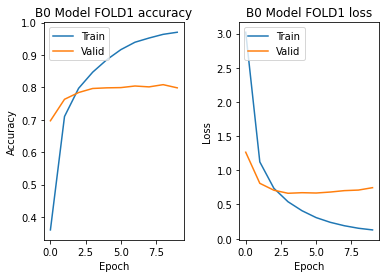

	FOLD1 	loss : 0.1523 	acc : 0.9638 	val_loss : 0.711 	val_acc : 0.808


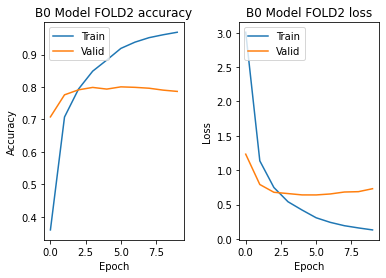

	FOLD2 	loss : 0.3069 	acc : 0.9189 	val_loss : 0.639 	val_acc : 0.800


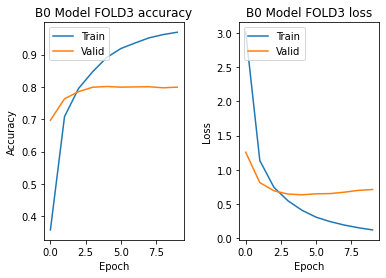

	FOLD3 	loss : 0.4088 	acc : 0.8910 	val_loss : 0.635 	val_acc : 0.801


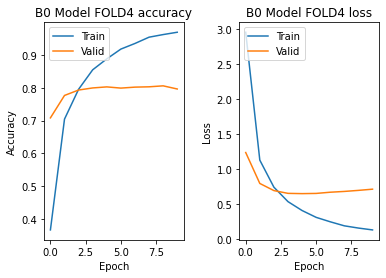

	FOLD4 	loss : 0.1561 	acc : 0.9618 	val_loss : 0.696 	val_acc : 0.806


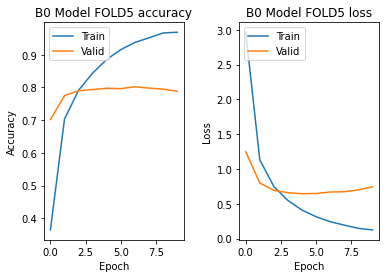

	FOLD5 	loss : 0.2428 	acc : 0.9374 	val_loss : 0.670 	val_acc : 0.802

AVERAGE RESULT
	TRAIN : 0.935
	VALID : 0.804



In [8]:
histroy_path = './history/'

acc_list = [] 
val_acc_list = []

print("\n" + weights.upper() + ' ' + mode + " MODEL")
print("\nFOLD HISTORY RESULT OF BEST MODEL")

for i in range(1, fold+1):
    
    #### Load training history ####
    df = pd.read_csv(histroy_path + '/' + weights + '_' + mode + '_FOLD' + str(i)  +'_history.csv')
    
    #### History data plot ####
    plt.subplots_adjust(wspace=0.4)
    plt.subplot(1, 2, 1)
    plt.plot(df['accuracy'])
    plt.plot(df['val_accuracy'])
    plt.title('%s Model FOLD%d accuracy' %(mode, i))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(df['loss'])
    plt.plot(df['val_loss'])
    plt.title('%s Model FOLD%d loss' % (mode, i))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Valid'], loc='upper left')
    
    plt.show()
    
    #### Best valid accuracy select ####
    df = df.sort_values(by=['val_accuracy'], ascending=False)
    df = df.iloc[0]

    acc = df['accuracy']
    val_acc = df['val_accuracy']
    loss = df['loss']
    val_loss = df['val_loss']
    
    result_str = "\tFOLD%d \tloss : %0.4f \tacc : %0.4f \tval_loss : %0.3f \tval_acc : %0.3f" %(i, loss, acc, val_loss, val_acc)
    
    acc_list.append(acc)
    val_acc_list.append(val_acc)
    
    print(result_str)
    
    if valid_fold == break_fold:
        break

#### Print average result ####
print("\nAVERAGE RESULT")
print("\tTRAIN : %0.3f" %(sum(acc_list)/len(acc_list)))
print("\tVALID : %0.3f" %(sum(val_acc_list)/len(val_acc_list)))


## Model evaluation

In [11]:
model_path = './model/imagenet_B0_FOLD1.hdf5'
valid_fold = 1
predictions = np.array([])
labels = np.array([])

#### Data parameter select ####
def model_info(mode):
    if mode == 'B0':
        IMAGE_SIZE = 224
        BATCH_SIZE = 32
    elif mode == 'B1':
        IMAGE_SIZE = 240
        BATCH_SIZE = 32
    elif mode == 'B2':
        IMAGE_SIZE = 260
        BATCH_SIZE = 32
    elif mode == 'B3':
        IMAGE_SIZE = 300
        BATCH_SIZE = 32
    elif mode == 'B4':
        IMAGE_SIZE = 380
        BATCH_SIZE = 30
    elif mode == 'B5':
        IMAGE_SIZE = 456
        BATCH_SIZE = 14

    return IMAGE_SIZE, BATCH_SIZE

#### Final confusion matrix & accuracy report ####
def valid_report(test, y_pred):
    print("\n###############################")
    print("###### PREDICTION RESULT ######")
    print("###############################\n")

    print('Confusion Matrix')
    cm = confusion_matrix(test, y_pred)
    print(cm)
    print('\nClassification Report')
    print(classification_report(test, y_pred))
    np.set_printoptions(precision=2)

#### Data parameter select ####
IMAGE_SIZE, BATCH_SIZE = model_info(mode)

#### Valid data pre-processing #### 
valid_ds = image_dataset_from_directory(
    directory=data_path + '/' + str(valid_fold),
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE))

#### Load trained model ####
model = tf.keras.models.load_model(model_path)

#### Model prediction using valid data
for x, y in valid_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

#### Print model result ####
valid_report(labels, predictions)


Found 4072 files belonging to 120 classes.

###############################
###### PREDICTION RESULT ######
###############################

Confusion Matrix
[[22  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  1]
 [ 0  0  0 ...  2 26  0]
 [ 0  0  0 ...  0  0 33]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.73      0.79        30
         1.0       0.83      0.92      0.87        37
         2.0       0.73      0.94      0.82        50
         3.0       0.71      0.76      0.73        29
         4.0       0.70      0.67      0.68        42
         5.0       0.97      0.86      0.91        37
         6.0       0.90      0.90      0.90        39
         7.0       0.79      0.76      0.78        34
         8.0       0.79      0.68      0.73        34
         9.0       0.87      0.98      0.92        47
        10.0       0.82      0.91      0.86        35
        11.0  